In [96]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [97]:
df = pd.read_csv('골프장데이터_계절_월_add.csv')

C:\src\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:ylabel='예약자거주지값,골프장명'>

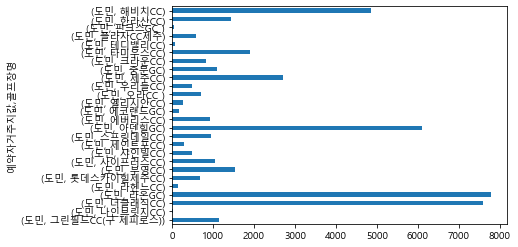

In [20]:
df.groupby([df.예약자거주지값[df.예약자거주지값=='도민'],df.골프장명]).골프장명.count().plot.barh()

<AxesSubplot:ylabel='예약자거주지값,골프장명'>

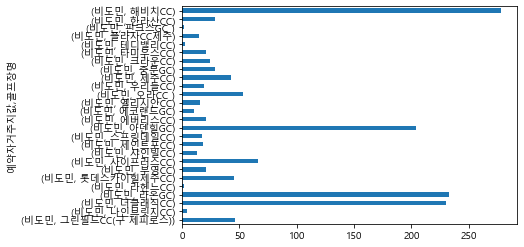

In [19]:
df.groupby([df.예약자거주지값[df.예약자거주지값=='비도민'],df.골프장명]).골프장명.count().plot.barh()

In [33]:
df.예약자골프경력값.value_counts()

1~3년     7290
4~6년     5490
10년이상    4027
1년미만     2962
Name: 예약자골프경력값, dtype: int64

In [34]:
df.예약자평균사용값.value_counts()

2회      6131
3회      4060
4회      3735
5회이상    3119
1회이하    2720
Name: 예약자평균사용값, dtype: int64

## 실력별로 나누기

<AxesSubplot:ylabel='예약자평균사용값,예약자골프경력값,골프장명'>

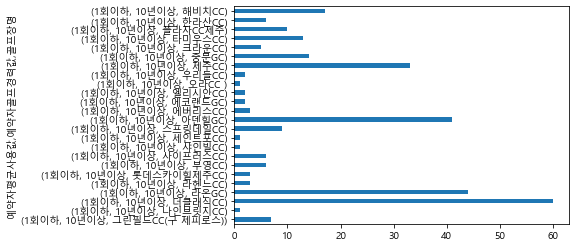

In [47]:
df.groupby([df.예약자평균사용값[df.예약자평균사용값=='1회이하'],df.예약자골프경력값[df.예약자골프경력값=='10년이상'],df.골프장명]).골프장명.count().plot.barh()

<AxesSubplot:ylabel='예약자평균사용값,예약자골프경력값,골프장명'>

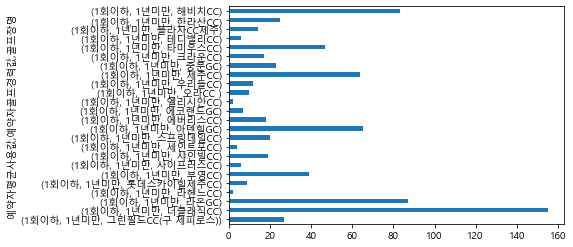

In [48]:
df.groupby([df.예약자평균사용값[df.예약자평균사용값=='1회이하'],df.예약자골프경력값[df.예약자골프경력값=='1년미만'],df.골프장명]).골프장명.count().plot.barh()

<AxesSubplot:ylabel='예약자거주지값,골프장명'>

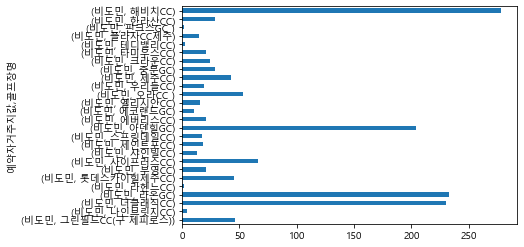

In [49]:
df.groupby([df.예약자거주지값[df.예약자거주지값=='비도민'],df.골프장명]).골프장명.count().plot.barh()

In [50]:
df.isnull().sum()

골프장명             0
골프장지역명           0
골프장멤버십값          0
골프장유형값           0
사용일자         18796
사용시간값        18796
사용유형명        18796
거주자금액        18796
비거주자금액       18796
결제수단명        18796
총인원수         18796
거주자인원수       18796
비거주자인원수      18796
예약일자         18796
예약시간         18796
판매업체명            0
예약자성별코드          0
예약자연령대코드     15228
예약자거주지값          0
예약자평균값       23448
예약자골프경력값     25557
예약자평균사용값     25561
예약자사용성향값     26709
통화일자         26530
통화시간         26530
해당년도         18796
통화,사용일자년도        0
계절               0
월                0
dtype: int64

In [98]:
df.사용시간값.value_counts()

705.0     400
719.0     375
748.0     337
726.0     312
740.0     312
         ... 
856.0       1
909.0       1
1057.0      1
1008.0      1
1006.0      1
Name: 사용시간값, Length: 410, dtype: int64

## 시간대로 나누기
 - 이른 아침(5,6,7,8) , 오전(9,10,11,12) , 오후(13,14,15,16,17) , 야간(18,19,20,21,22,23,24) 

In [65]:
int(df.사용시간값[0]/100)

8

In [70]:
int(df.사용시간값[4]/%100

21.0

In [88]:
df.사용시간값[4]/100

11.21

In [66]:
df.사용시간값.max()

1710.0

In [68]:
df.사용시간값 = df.사용시간값

0         815.0
1         809.0
2         823.0
3         809.0
4        1121.0
          ...  
45321       NaN
45322       NaN
45323       NaN
45324       NaN
45325       NaN
Name: 사용시간값, Length: 45326, dtype: float64

In [85]:
df['시간대']='24시간'

In [99]:
df['사용시간값']=df['사용시간값'].apply(lambda x: 9999 if x == np.NaN else x)

In [104]:
df.fillna(99999,inplace=True)

In [122]:
df2 = pd.read_csv('골프장데이터_계절_월_add.csv')

C:\src\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [123]:
df2

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절,월
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,8,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,14,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,30,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,2월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,40,NaN,NaN,NaN,202106.0,103439.0,NaN,2021,여름,6월
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1~3년,2회,골프초년생,202106.0,104114.0,NaN,2021,여름,6월
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1~3년,2회,골프초년생,202106.0,104132.0,NaN,2021,여름,6월
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1~3년,2회,골프초년생,202106.0,104224.0,NaN,2021,여름,6월


In [194]:
df['시간대'] = df['사용시간값'].apply(lambda x: '새벽' if ( round(x/100) in [1,2,3,4,5,6,7]) else 
                                    '아침' if ( round(x/100) in [8,9,10,11,12]) else 
                                   '오후' if ( round(x/100) in [13,14,15]) else 
                                    '야간'  if ( round(x/100) in [16,17]) else '미분류')

In [190]:
df_시간대=df.시간대

In [191]:
df_시간대 = copy.deepcopy(df.시간대)

In [192]:
df_시간대=pd.DataFrame(df_시간대)

In [195]:
df_시간대.value_counts()

시간대
미분류    18796
아침     12200
새벽      9038
오후      4539
야간       753
dtype: int64

In [196]:
df_시간값합친거=pd.concat([df2,df_시간대],axis=1)

In [197]:
df_시간값합친거

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자골프경력값,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절,월,시간대
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,NaN,NaN,NaN,NaN,NaN,2021.0,2021,겨울,2월,아침
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,202106.0,103439.0,NaN,2021,여름,6월,미분류
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,1~3년,2회,골프초년생,202106.0,104114.0,NaN,2021,여름,6월,미분류
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,1~3년,2회,골프초년생,202106.0,104132.0,NaN,2021,여름,6월,미분류
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,1~3년,2회,골프초년생,202106.0,104224.0,NaN,2021,여름,6월,미분류


In [198]:
df.사용시간값.value_counts()

99999.0    18796
705.0        400
719.0        375
748.0        337
740.0        312
           ...  
947.0          1
1134.0         1
1502.0         1
954.0          1
1020.0         1
Name: 사용시간값, Length: 411, dtype: int64

In [199]:
df_러닝 = pd.read_csv('러닝용골프장데이터.csv')

In [200]:
df_러닝.rename(columns={'사용일자':'사용일월'},inplace=True)

In [201]:
df_러닝

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일월,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약일자,예약시간,판매업체명,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값
0,해비치CC,동부권,회원제+대중제,36,20210120,815,SKY,170000,170000,현장결제,...,20210114,93902,해비치CC,1,50.0,비도민,8,NaN,NaN,NaN
1,아덴힐GC,서부권,대중제,18,20210121,809,왕이메,90000,135000,현장결제,...,20210114,94001,아덴힐GC,1,50.0,비도민,8,NaN,NaN,NaN
2,아덴힐GC,서부권,대중제,18,20210126,823,왕이메,90000,135000,현장결제,...,20210114,95020,아덴힐GC,1,50.0,도민,14,NaN,NaN,NaN
3,아덴힐GC,서부권,대중제,18,20210128,809,왕이메,90000,135000,현장결제,...,20210124,174556,아덴힐GC,0,NaN,도민,NaN,NaN,NaN,NaN
4,아덴힐GC,서부권,대중제,18,20210208,1121,새별,110000,145000,현장결제,...,20210124,182906,아덴힐GC,2,40.0,도민,30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26525,해비치CC,동부권,회원제+대중제,36,20201231,1227,LAKE,105000,130000,현장결제,...,20201222,124518,해비치CC,0,NaN,도민,NaN,NaN,NaN,NaN
26526,라온GC,서부권,대중제,27,20201226,1132,STONE,142500,212500,현장결제,...,20201222,135305,라온GC,0,NaN,도민,NaN,NaN,NaN,NaN
26527,더클래식CC,동부권,대중제,18,20210127,743,대중제(Valley),60000,80000,현장결제,...,20201223,90305,섬프로,2,NaN,도민,NaN,4~6년,1회이하,주중골프
26528,아덴힐GC,서부권,대중제,18,20201228,1215,새별,105000,125000,현장결제,...,20201223,94749,아덴힐GC,2,40.0,도민,NaN,NaN,NaN,NaN


In [202]:
df_러닝.사용일월

0        20210120
1        20210121
2        20210126
3        20210128
4        20210208
           ...   
26525    20201231
26526    20201226
26527    20210127
26528    20201228
26529    20210119
Name: 사용일월, Length: 26530, dtype: int64

In [145]:
df_러닝

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일월,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약일자,예약시간,판매업체명,예약자성별코드,예약자연령대코드,예약자거주지값,예약자평균값,예약자골프경력값,예약자평균사용값,예약자사용성향값
0,해비치CC,동부권,회원제+대중제,36,20210120,815,SKY,170000,170000,현장결제,...,20210114,93902,해비치CC,1,50.0,비도민,8,NaN,NaN,NaN
1,아덴힐GC,서부권,대중제,18,20210121,809,왕이메,90000,135000,현장결제,...,20210114,94001,아덴힐GC,1,50.0,비도민,8,NaN,NaN,NaN
2,아덴힐GC,서부권,대중제,18,20210126,823,왕이메,90000,135000,현장결제,...,20210114,95020,아덴힐GC,1,50.0,도민,14,NaN,NaN,NaN
3,아덴힐GC,서부권,대중제,18,20210128,809,왕이메,90000,135000,현장결제,...,20210124,174556,아덴힐GC,0,NaN,도민,NaN,NaN,NaN,NaN
4,아덴힐GC,서부권,대중제,18,20210208,1121,새별,110000,145000,현장결제,...,20210124,182906,아덴힐GC,2,40.0,도민,30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26525,해비치CC,동부권,회원제+대중제,36,20201231,1227,LAKE,105000,130000,현장결제,...,20201222,124518,해비치CC,0,NaN,도민,NaN,NaN,NaN,NaN
26526,라온GC,서부권,대중제,27,20201226,1132,STONE,142500,212500,현장결제,...,20201222,135305,라온GC,0,NaN,도민,NaN,NaN,NaN,NaN
26527,더클래식CC,동부권,대중제,18,20210127,743,대중제(Valley),60000,80000,현장결제,...,20201223,90305,섬프로,2,NaN,도민,NaN,4~6년,1회이하,주중골프
26528,아덴힐GC,서부권,대중제,18,20201228,1215,새별,105000,125000,현장결제,...,20201223,94749,아덴힐GC,2,40.0,도민,NaN,NaN,NaN,NaN


In [203]:
df_6=pd.concat([df_시간값합친거,df_러닝.사용일월],axis=1)

In [204]:
df_6

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절,월,시간대,사용일월
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210120.0
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210121.0
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210126.0
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210128.0
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,2월,아침,20210208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,202106.0,103439.0,NaN,2021,여름,6월,미분류,NaN
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2회,골프초년생,202106.0,104114.0,NaN,2021,여름,6월,미분류,NaN
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2회,골프초년생,202106.0,104132.0,NaN,2021,여름,6월,미분류,NaN
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2회,골프초년생,202106.0,104224.0,NaN,2021,여름,6월,미분류,NaN


In [205]:
df_call= pd.read_csv('C:\\workspace\\Next_Ez_Training\\data\\golflike\\섬프로_전화_2021.csv')

In [206]:
df_call.TALKDTTM

0        20210531
1        20210706
2        20210706
3        20210706
4        20210706
           ...   
18791    20210615
18792    20210615
18793    20210615
18794    20210615
18795    20210615
Name: TALKDTTM, Length: 18796, dtype: int64

In [207]:
df_6

,골프장명,골프장지역명,골프장멤버십값,골프장유형값,사용일자,사용시간값,사용유형명,거주자금액,비거주자금액,결제수단명,...,예약자평균사용값,예약자사용성향값,통화일자,통화시간,해당년도,"통화,사용일자년도",계절,월,시간대,사용일월
0,해비치CC,동부권,회원제+대중제,36,202101.0,815.0,SKY,170000.0,170000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210120.0
1,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210121.0
2,아덴힐GC,서부권,대중제,18,202101.0,823.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210126.0
3,아덴힐GC,서부권,대중제,18,202101.0,809.0,왕이메,90000.0,135000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,1월,아침,20210128.0
4,아덴힐GC,서부권,대중제,18,202102.0,1121.0,새별,110000.0,145000.0,현장결제,...,NaN,NaN,NaN,NaN,2021.0,2021,겨울,2월,아침,20210208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45321,제주CC,제주시권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,202106.0,103439.0,NaN,2021,여름,6월,미분류,NaN
45322,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2회,골프초년생,202106.0,104114.0,NaN,2021,여름,6월,미분류,NaN
45323,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2회,골프초년생,202106.0,104132.0,NaN,2021,여름,6월,미분류,NaN
45324,더클래식CC,동부권,대중제,18,NaN,NaN,NaN,NaN,NaN,NaN,...,2회,골프초년생,202106.0,104224.0,NaN,2021,여름,6월,미분류,NaN


In [208]:
df_call=copy.deepcopy(pd.concat([df_6.통화일자,df_call.TALKDTTM],axis=1))

In [209]:
df_call.rename(columns={'TALKDTTM':'통화사용월일'},inplace=True)

In [211]:
# del df_call['통화일자']

In [212]:
df_call

,통화사용월일
0,20210531.0
1,20210706.0
2,20210706.0
3,20210706.0
4,20210706.0
...,...
45321,NaN
45322,NaN
45323,NaN
45324,NaN


In [213]:
df_7=pd.concat([df_6,df_call],axis=1)

In [215]:
df_7.시간대.value_counts()

미분류    18796
아침     12200
새벽      9038
오후      4539
야간       753
Name: 시간대, dtype: int64

In [216]:
# df_7.to_csv('골프장데이터ver_date_0223.csv',index=False)

## 시간대 분석

<AxesSubplot:>

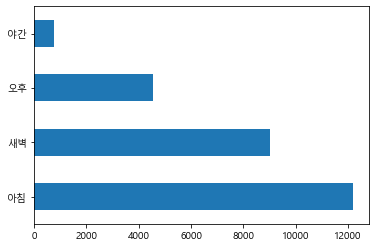

In [218]:
df_7.시간대[df.시간대!='미분류'].value_counts().plot.barh()